In [2]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import datetime
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import text2emotion as te

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\szymo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\szymo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\szymo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\szymo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [69]:
def get_user_tweets(username, num_tweets, start_date, end_date):
    tweets = []
    
    for tweet in sntwitter.TwitterSearchScraper(search(username=username, since=start_date, until=end_date, retweet="y", replies="y")).get_items():
        tweets.append(tweet)
        if len(tweets) == num_tweets:
            break
    
    return tweets


def get_tweet_comments(username, tweet_id, num_comments):
    comments = []
    for comment in sntwitter.TwitterSearchScraper(f"to:{username} conversation_id:{tweet_id}").get_items():
        comments.append([comment.date, comment.rawContent])
        if len(comments) == num_comments:
            break
    return comments


def search(text="",username="",since="",until="",retweet="",replies=""): 
    q = text 
    if username!='': 
        q += f" from:{username}"
    if until=='': 
        until = datetime.datetime.strftime(datetime.date.today(), '%Y-%m-%d') 
    q += f" until:{until}" 
    if since=='': 
        since = datetime.datetime.strftime(datetime.datetime.strptime(until, '%Y-%m-%d') - datetime.timedelta(days=7), '%Y-%m-%d') 
    q += f" since:{since}" 
    if retweet == 'y': 
        q += f" exclude:retweets" 
    if replies == 'y': 
        q += f" exclude:replies" 
    
    return q 

In [70]:
tweets = []
comments_to_tweet = []

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

current_date = start_date
while current_date <= end_date:
    current_date_str = current_date.strftime('%Y-%m-%d')
    tomorrow_str = (current_date + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    tweet = get_user_tweets('elonmusk', 1, current_date_str, tomorrow_str)
    if len(tweet) > 0:
        id = tweet[0].id
        url = tweet[0].url
        tweets.append([tweet[0].date, tweet[0].rawContent, id, url])
        comments = get_tweet_comments('elonmusk', id, url, tweet[0].date, 100)
        comments_to_tweet.extend(comments)
    current_date += datetime.timedelta(days=1)

Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping a

In [ ]:
tweets_df = pd.DataFrame(tweets, columns=['date', 'content', 'id', 'url'])
tweets_df.to_csv('elonmusk_tweets.csv', index=False)

In [ ]:
comments_df = pd.DataFrame(comments_to_tweet, columns=['date', 'content', 'tweet_id', 'tweet_url', 'tweet_date', 'url'])
comments_df.to_csv('elonmusk_comments.csv', index=False)

In [3]:
df = pd.read_csv('elonmusk_comments.csv')
df.shape

(42960, 6)

In [4]:
df['tweet_date'] = df['tweet_date'].apply(lambda x: x.split(' ')[0])
df.head()

,date,content,tweet_id,tweet_url,tweet_date,url
0,2022-04-10 20:15:55+00:00,@elonmusk Writing a paper on forward contamina...,1212264717617639424,https://twitter.com/elonmusk/status/1212264717...,2020-01-01,https://twitter.com/sheryleekathrne/status/151...
1,2021-01-08 00:24:51+00:00,"@elonmusk For Elon Musk, dont worry you will b...",1212264717617639424,https://twitter.com/elonmusk/status/1212264717...,2020-01-01,https://twitter.com/interpolasyon/status/13473...
2,2020-03-24 23:38:43+00:00,@elonmusk Awesome email me,1212264717617639424,https://twitter.com/elonmusk/status/1212264717...,2020-01-01,https://twitter.com/LeviladdB/status/124259673...
3,2020-03-07 18:31:30+00:00,@elonmusk Seks,1212264717617639424,https://twitter.com/elonmusk/status/1212264717...,2020-01-01,https://twitter.com/maybeucantry/status/123635...
4,2020-01-24 21:01:15+00:00,@elonmusk Question are you by any chance a gamer?,1212264717617639424,https://twitter.com/elonmusk/status/1212264717...,2020-01-01,https://twitter.com/Pocketguy14/status/1220813...


In [5]:
df = df.drop_duplicates(subset=['content'])
df = df[~df['content'].str.contains('@@@@@@@@')]
df = df[~df['content'].str.contains('http://')]
df = df[~df['content'].str.contains('https://')]
df = df.dropna()
df.shape

(34068, 6)

In [6]:
stopwords_list = stopwords.words('english')
stopwords_list.extend(['elonmusk'])

def tokenize_and_lemmatize(x):
    words = nltk.word_tokenize(x)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords_list]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

df['content'] = df['content'].apply(lambda x: tokenize_and_lemmatize(x))

In [7]:
sid = SentimentIntensityAnalyzer()

df['sentiment'] = df['content'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])

In [8]:
max_sentiment = df['sentiment'].max()
min_sentiment = df['sentiment'].min()
print(max_sentiment, min_sentiment)

0.9918 -0.9991


In [9]:
most_postive = df.sort_values(by=['sentiment'], ascending=False).head(5)
for i in range(most_postive.shape[0]):
    print(most_postive.iloc[i, 1])
    print('')

['hi', 'nice', 'good', 'congratulation', 'men', 'good', 'luck', 'next', 'time', 'doll', 'men', 'support', 'always', 'first', 'time', 'see', 'like', 'congratulation', 'men', 'proud', 'japan', 'fan', 'good', 'luck', 'handsome', 'men', 'world', 'good', 'luck']

['hola', 'please', 'negotiate', 'contract', 'assemblyline', 'worker', 'happier', 'happier', 'car', 'better', 'trouble', 'free', 'sell', 'amount', 'percentage', 'corporate', 'profit', 'win', 'win', 'win', 'win', 'win']

['bet', 'also', 'love', 'good', 'thing', 'love', 'delicious', 'food', 'love', 'beauty', 'love', 'happiness']

['read', 'interesting', 'post', 'tube', 'last', 'night', 'closed', 'poll', 'q', 'relationship', 'two', 'dynamic', 'interdependent', 'white', 'people', 'privilege', 'privilege', 'whiteprivilege', 'discrimination', 'youtube', 'kid', 'know', 'nothing', 'discrimination', 'racism', 'zero', 'america', 'abundant', 'free', 'money', 'education', 'first', 'taxpayer', 'pay', 'every', 'dollar', 'social', 'svc', 'program'

In [10]:
most_negative = df.sort_values(by=['sentiment'], ascending=True).head(5)
for i in range(most_negative.shape[0]):
    print(most_negative.iloc[i, 1])
    print('')

['test', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt', 'cunt']

['fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci', 'fire', 'fauci']

['democrat', 'started', 'slavery', 'van', 'buren', 'killing', 'indian', 'around', 'country', 'every', 'american', 'soldier', 'killed', 'battle', 'democratic', 'war', 'party', 'intentionally', 'extended', 'war', 'vietnam', 'economy', 'fallen', 'every', 'dem', 'regime']

['flcnhvy', 'medium', 'continued', 'tesla', 'hate', 'tired', 'killer', 'killer', 'killer', 'ice', 'killer', 'collectively', 'every', 'new', 'ev'

In [11]:
daily_sentiment_df = df.groupby('tweet_id')
daily_sentiment_df = daily_sentiment_df.agg({'sentiment': 'mean', 'tweet_date': 'first'})
daily_sentiment_df = daily_sentiment_df.sort_values(by=['tweet_date'])
daily_sentiment_df.head()

,sentiment,tweet_date
tweet_id,,
1212264717617639424,0.219767,2020-01-01
1213620051770671104,0.125058,2020-01-05
1214483582363693057,0.201341,2020-01-07
1214956305808527361,0.219007,2020-01-08
1215212801876090880,0.140033,2020-01-09


In [12]:
daily_sentiment_df.sort_values(by=['sentiment'], ascending=False).head(5)

,sentiment,tweet_date
tweet_id,,
1482495353542754308,0.7650,2022-01-15
1372688191803768840,0.6486,2021-03-18
1406708267141648384,0.5955,2021-06-20
1431867661164687360,0.5794,2021-08-29
1508983155205804038,0.5524,2022-03-30


In [13]:
tweets_df = pd.read_csv('elonmusk_tweets.csv')
t = tweets_df[tweets_df['id'] == 1482495353542754308]
print(t.content)


438    https://t.co/6qGivJoQf0
Name: content, dtype: object


In [14]:
t = tweets_df[tweets_df['id'] == 1372688191803768840]
print(t.content)


260    First Super Heavy Booster https://t.co/0K5QPsEbbt
Name: content, dtype: object


In [15]:
daily_sentiment_df.sort_values(by=['sentiment'], ascending=True).head(5)

,sentiment,tweet_date
tweet_id,,
1436086743720251394,-0.77830,2021-09-09
1457984721892352002,-0.59940,2021-11-09
1531733235625074688,-0.58590,2022-05-31
1383548841438236674,-0.44035,2021-04-17
1294922167310663681,-0.39820,2020-08-16


In [16]:
pd.set_option('display.max_colwidth', None)
t = tweets_df[tweets_df['id'] == 1436086743720251394]
print(t.content)

366    Tesla Model S Plaid just set official world speed record for a production electric car at Nurburgring. Completely unmodified, directly from factory. https://t.co/AaiFtfW5Ht
Name: content, dtype: object


In [17]:
t = tweets_df[tweets_df['id'] == 1457984721892352002]
print(t.content)

397    I have all their albums https://t.co/OwQaSJADDE
Name: content, dtype: object


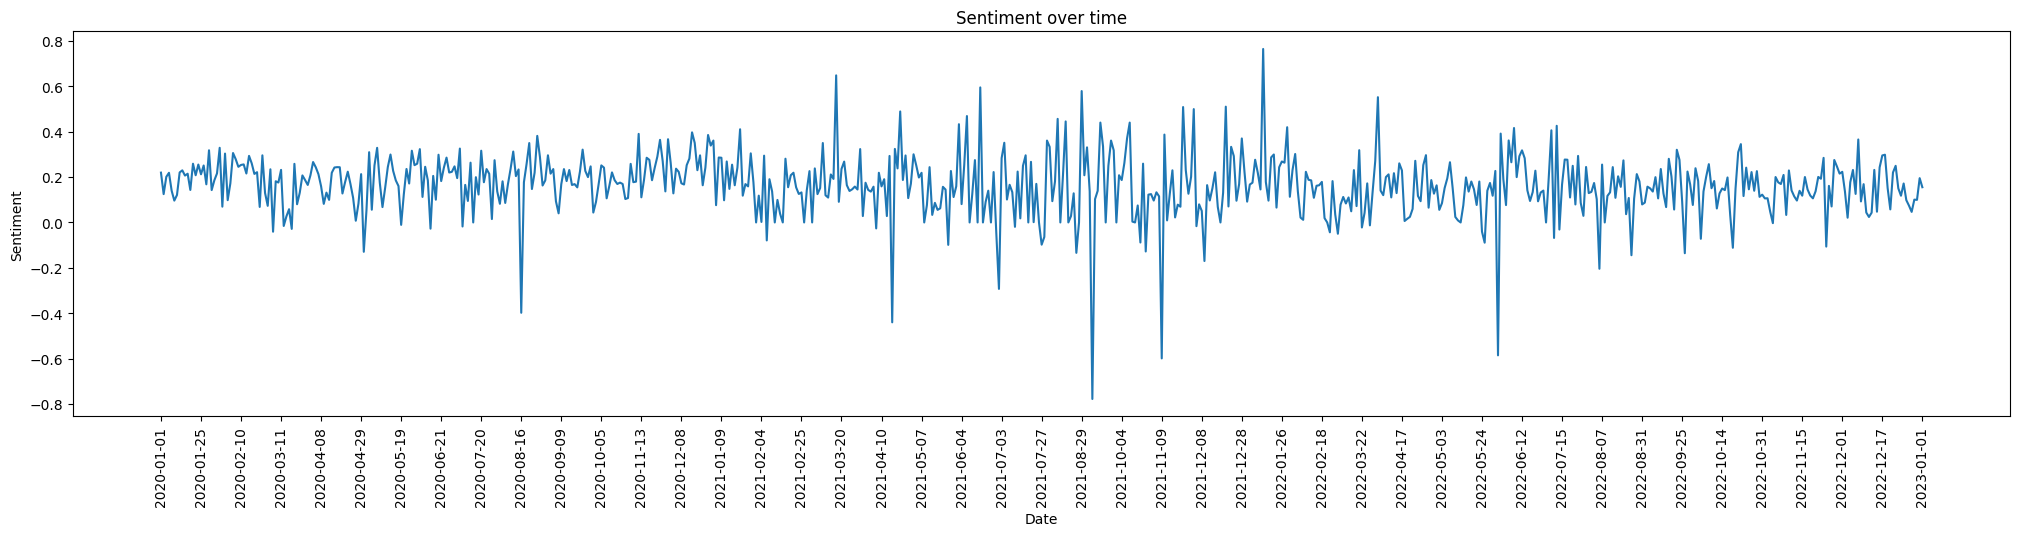

In [18]:
plt.figure(figsize=(25, 5))
plt.plot(daily_sentiment_df['tweet_date'], daily_sentiment_df['sentiment'])
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment over time')
plt.xticks(daily_sentiment_df['tweet_date'][::15], rotation=90)
plt.show()

In [19]:
print(daily_sentiment_df[daily_sentiment_df['sentiment'] == daily_sentiment_df['sentiment'].min()])

                     sentiment  tweet_date
tweet_id                                  
1436086743720251394    -0.7783  2021-09-09


In [20]:
print(daily_sentiment_df[daily_sentiment_df['sentiment'] == daily_sentiment_df['sentiment'].max()])

                     sentiment  tweet_date
tweet_id                                  
1482495353542754308      0.765  2022-01-15


In [21]:
all_words = []
for i in range(df.shape[0]):
    all_words.extend(df.iloc[i, 1])
sid = SentimentIntensityAnalyzer()
scores = sid.polarity_scores(' '.join(all_words))
print(scores)

{'neg': 0.1, 'neu': 0.636, 'pos': 0.264, 'compound': 1.0}


In [ ]:
print(te.get_emotion(' '.join(all_words)))